In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train_set.csv')


In [3]:
train.isnull().any()#checking missing data

id                       False
week                     False
center_id                False
meal_id                  False
checkout_price           False
base_price               False
emailer_for_promotion    False
homepage_featured        False
num_orders               False
dtype: bool

In [4]:
meal_info = pd.read_csv("meal_detail.csv")
center_info = pd.read_csv("fulfilment_center_info.csv")

In [5]:
print("The Shape of Demand dataset :",train.shape)
print("The Shape of Fulmilment Center Information dataset :",center_info.shape)
print("The Shape of Meal information dataset :",meal_info.shape)
#print("The Shape of Test dataset :",test.shape)

The Shape of Demand dataset : (456548, 9)
The Shape of Fulmilment Center Information dataset : (77, 5)
The Shape of Meal information dataset : (51, 3)


In [6]:
trainfinal = pd.merge(train, meal_info, on="meal_id", how="outer")
trainfinal = pd.merge(trainfinal, center_info, on="center_id", how="outer")
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [7]:
trainfinal.apply(lambda x:len(x.unique()))

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
category                     14
cuisine                       4
city_code                    51
region_code                   8
center_type                   3
op_area                      30
dtype: int64

In [8]:
trainfinal.corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
id,1.000000,0.002225,0.002641,0.000488,0.001941,0.002909,0.002001,0.003111,0.000702,-0.000387,-0.000648,-0.000090
week,0.002225,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550
center_id,0.002641,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,0.061078,-0.003426,-0.111869
meal_id,0.000488,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546
checkout_price,0.001941,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,-0.004805,-0.003648,0.021569
base_price,0.002909,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,-0.002054,-0.001934,0.018031
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976
city_code,-0.000387,0.000405,0.061078,-0.003198,-0.004805,-0.002054,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476


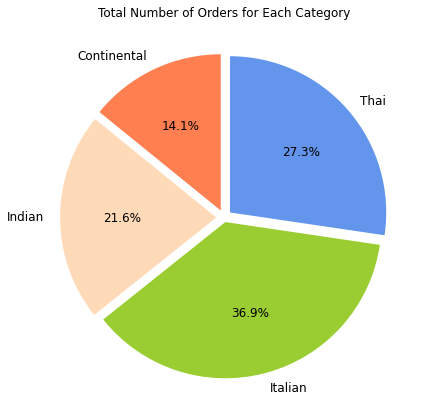

In [9]:
plt.figure(figsize=(6,6))
colors = ['coral','#FFDAB9','yellowgreen','#6495ED']
plt.pie(trainfinal.groupby(['cuisine']).num_orders.sum(),
    labels=trainfinal.groupby(['cuisine']).num_orders.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.03,0.05),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('Total Number of Orders for Each Category')
plt.tight_layout()
plt.show()

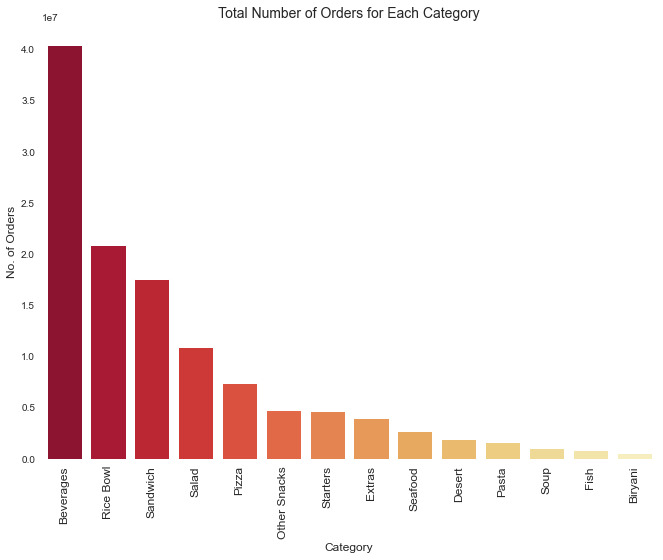

In [10]:
fig=plt.figure(figsize=(11,8))
sns.set_style("white")

plt.xticks(rotation=90,fontsize=12)
plt.title('Total Number of Orders for Each Category',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='category', data=trainfinal.groupby('category').num_orders.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r');
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Category',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

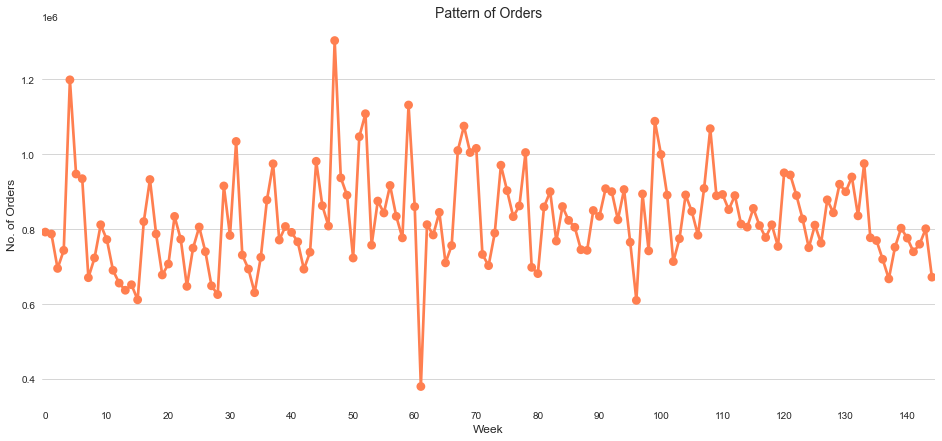

In [11]:
fig=plt.figure(figsize=(16,7))
sns.set_style("whitegrid")
plt.title('Pattern of Orders',fontdict={'fontsize':14})

sns.pointplot(x=trainfinal.groupby('week').sum().reset_index()['week'],y=trainfinal.groupby('week').sum().reset_index()['num_orders'],color='coral')
plt.xticks(range(0, 150, 10), list(np.arange(0,160,10)))
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Week',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

we could see that the highest number of orders were received in week 48 and the lowest in week 62.

In [12]:
from sklearn.preprocessing import LabelEncoder
lb1 = LabelEncoder()
trainfinal['center_type'] = lb1.fit_transform(trainfinal['center_type'])

lb2 = LabelEncoder()
trainfinal['category'] = lb1.fit_transform(trainfinal['category'])
trainfinal['cuisine'] = lb1.fit_transform(trainfinal['cuisine'])

In [13]:
trainfinal.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,0,3,647,56,2,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,0,3,647,56,2,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,0,3,647,56,2,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,0,3,647,56,2,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,0,3,647,56,2,2.0


In [14]:
trainfinal.corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
id,1.000000,0.002225,0.002641,0.000488,0.001941,0.002909,0.002001,0.003111,0.000702,-0.000516,-0.002583,-0.000387,-0.000648,0.000473,-0.000090
week,0.002225,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.003802,-0.018096,0.000405,0.004600,0.000049,0.001550
center_id,0.002641,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,-0.008446,-0.020980,0.061078,-0.003426,-0.107398,-0.111869
meal_id,0.000488,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,0.249541,0.165249,-0.003198,-0.001662,-0.006158,-0.001546
checkout_price,0.001941,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,0.277529,-0.686125,-0.004805,-0.003648,-0.015923,0.021569
base_price,0.002909,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,0.282205,-0.720500,-0.002054,-0.001934,-0.013596,0.018031
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,0.095683,-0.151910,-0.005234,-0.007462,0.006194,-0.019462
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.000885,-0.014629,0.008640,0.003605,-0.030041,0.041498
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.026520,0.127653,0.041596,0.029744,-0.038199,0.176976
category,-0.000516,0.003802,-0.008446,0.249541,0.277529,0.282205,0.095683,0.000885,0.026520,1.000000,0.132044,0.007676,0.005776,-0.007919,0.014487


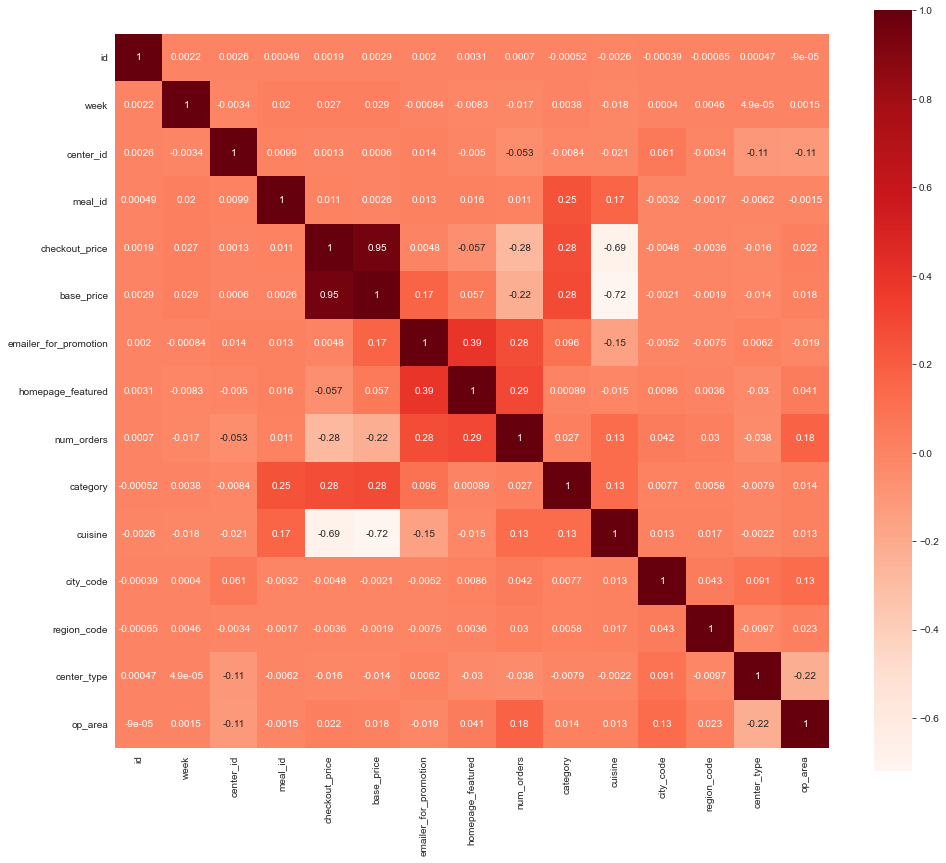

In [15]:
plt.figure(figsize=(16,14))
sns.heatmap(trainfinal.corr(),annot=True, square=True, cmap='Reds')

In [16]:
outlier_index = trainfinal[(trainfinal['num_orders']>13000)].index# removing outlier

In [17]:
trainfinal.drop(outlier_index,inplace = True)

In [18]:
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,0,3,647,56,2,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,0,3,647,56,2,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,0,3,647,56,2,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,0,3,647,56,2,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,0,3,647,56,2,2.0


In [19]:
X=trainfinal[["homepage_featured","meal_id","emailer_for_promotion","op_area","cuisine","category","region_code","city_code"]].values
Y=trainfinal['num_orders'].values

In [20]:
X

array([[   0., 1885.,    0., ...,    0.,   56.,  647.],
       [   0., 1885.,    0., ...,    0.,   56.,  647.],
       [   0., 1885.,    0., ...,    0.,   56.,  647.],
       ...,
       [   0., 2104.,    0., ...,    4.,   77.,  473.],
       [   0., 2104.,    0., ...,    4.,   77.,  473.],
       [   0., 2104.,    0., ...,    4.,   77.,  473.]])

In [21]:
print(X.shape)
print(Y.shape)

(456543, 8)
(456543,)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [23]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor1.fit(X_train, y_train)
y_pred1 = regressor1.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[436.46 297.  ]
 [ 46.92  80.  ]
 [ 68.78  68.  ]
 ...
 [ 55.86  26.  ]
 [ 52.08  54.  ]
 [297.03 190.  ]]


In [24]:
import pickle
pickle.dump(regressor1,open('regressor1.pkl','wb'))

In [25]:
from sklearn.tree import DecisionTreeRegressor
regressor2 = DecisionTreeRegressor(random_state = 0)
regressor2.fit(X_train, y_train)
y_pred2 = regressor2.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[436.3  297.  ]
 [ 46.91  80.  ]
 [ 68.65  68.  ]
 ...
 [ 56.2   26.  ]
 [ 50.99  54.  ]
 [296.4  190.  ]]


In [26]:
from sklearn import metrics#for DecisionTreeRegressor
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred2)))

RMSLE: 56.19480851710795


In [27]:
from sklearn import metrics #for RandomForestRegressor
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred1)))

RMSLE: 56.04909846293914


In [28]:
from sklearn.metrics import r2_score#for RandomForestRegressor
r2_score(y_test, y_pred1)

0.7451149645844318

In [29]:
from sklearn.metrics import r2_score#for DecisionTreeRegressor
r2_score(y_test, y_pred2)

0.7350238628721224

In [30]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
y_pred6 = KNN.predict(X_test)

In [31]:
from sklearn.metrics import r2_score #for KNeighborsRegressor
r2_score(y_test, y_pred6)

0.7186744603646367

In [32]:
from sklearn import metrics #for KNeighborsRegressor
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred6)))

RMSLE: 59.540751242098665


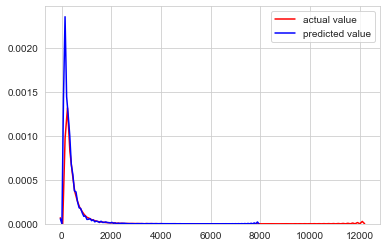

In [33]:
import seaborn as sns# relation b/w test and pred values of RandomForestRegressor
ax1=sns.distplot(y_test,hist=False, color="r", label="actual value")
sns.distplot(y_pred1,hist=False, color="b", label="predicted value", ax=ax1)

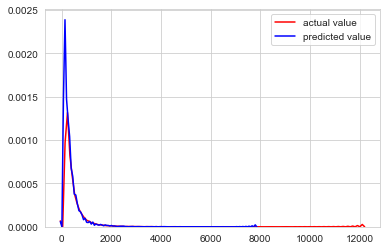

In [34]:
import seaborn as sns# relation b/w test and pred values of DecisionTreeRegressor
ax1=sns.distplot(y_test,hist=False, color="r", label="actual value")
sns.distplot(y_pred2,hist=False, color="b", label="predicted value", ax=ax1)

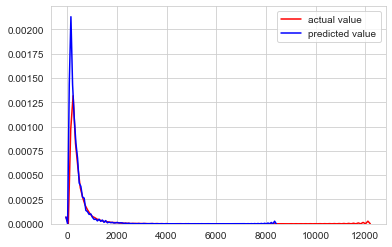

In [35]:
import seaborn as sns# relation b/w test and pred values of KNeighborsRegressor
ax1=sns.distplot(y_test,hist=False, color="r", label="actual value")
sns.distplot(y_pred6,hist=False, color="b", label="predicted value", ax=ax1)

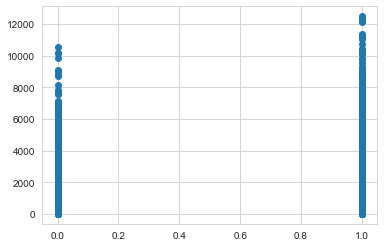

In [36]:
plt.scatter(trainfinal["homepage_featured"],trainfinal['num_orders'])

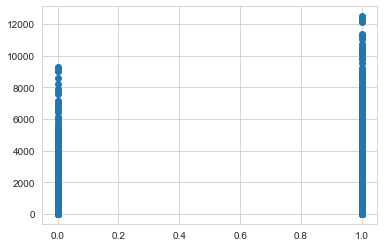

In [37]:
plt.scatter(trainfinal["emailer_for_promotion"],trainfinal['num_orders'])

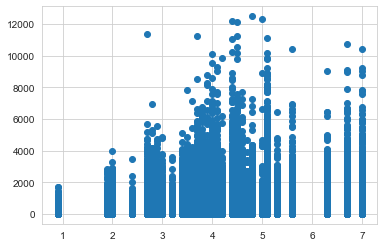

In [38]:
plt.scatter(trainfinal["op_area"],trainfinal['num_orders'])

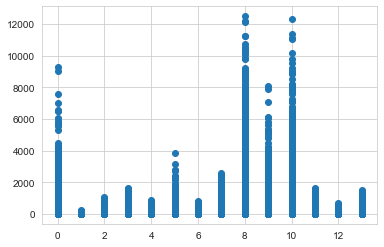

In [39]:
plt.scatter(trainfinal["category"],trainfinal['num_orders'])

In [40]:
trainfinal["category"]

0         0
1         0
2         0
3         0
4         0
         ..
456543    4
456544    4
456545    4
456546    4
456547    4
Name: category, Length: 456543, dtype: int64

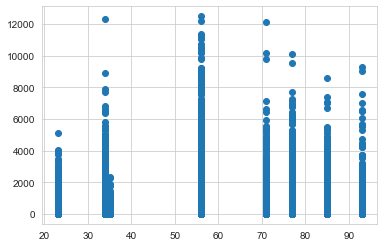

In [41]:
plt.scatter(trainfinal["region_code"],trainfinal['num_orders'])

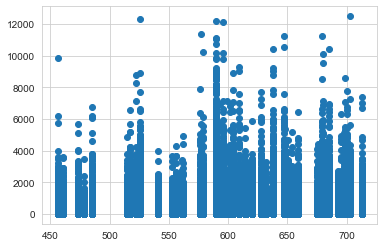

In [42]:
plt.scatter(trainfinal["city_code"],trainfinal['num_orders'])

# StandardScaler 

In [43]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X1=sc.fit_transform(X)
X1

array([[-0.35, -0.25, -0.3 , ..., -1.18, -0.03,  0.69],
       [-0.35, -0.25, -0.3 , ..., -1.18, -0.03,  0.69],
       [-0.35, -0.25, -0.3 , ..., -1.18, -0.03,  0.69],
       ...,
       [-0.35,  0.15, -0.3 , ..., -0.28,  1.16, -1.94],
       [-0.35,  0.15, -0.3 , ..., -0.28,  1.16, -1.94],
       [-0.35,  0.15, -0.3 , ..., -0.28,  1.16, -1.94]])

In [61]:
from joblib import dump
dump(sc,"sc2.save")

['sc2.save']

In [45]:
print(X1.shape)
print(Y.shape)

(456543, 8)
(456543,)


In [46]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y, test_size=0.2)

In [47]:
from sklearn.ensemble import RandomForestRegressor
reg2 = RandomForestRegressor(n_estimators = 200, random_state = 0)
reg2.fit(X_train1, y_train1)
y_pred3 = reg2.predict(X_test1)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test1.reshape(len(y_test1),1)),1))

[[ 53.19  81.  ]
 [316.69 258.  ]
 [ 58.56 122.  ]
 ...
 [118.24  55.  ]
 [ 51.38  68.  ]
 [121.24  96.  ]]


In [48]:
from sklearn import metrics# for RandomForestRegressor
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test1, y_pred3)))

RMSLE: 56.07943120219391


In [49]:
from sklearn.tree import DecisionTreeRegressor
reg3 = DecisionTreeRegressor(random_state = 2)
reg3.fit(X_train1, y_train1)
y_pred4 = reg3.predict(X_test1)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test1.reshape(len(y_test1),1)),1))

[[ 53.12  81.  ]
 [316.69 258.  ]
 [ 57.71 122.  ]
 ...
 [118.85  55.  ]
 [ 51.06  68.  ]
 [123.14  96.  ]]


In [50]:
from sklearn import metrics #for DecisionTreeRegressor
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test1, y_pred4)))

RMSLE: 56.235960919315374


In [51]:
from sklearn.metrics import r2_score# for RandomForestRegressor
r2_score(y_test1, y_pred3)

0.7376915818681733

In [52]:
from sklearn.metrics import r2_score# for DecisionTreeRegressor
r2_score(y_test1, y_pred4)

0.7273158676052094

In [53]:
import pickle
pickle.dump(reg2,open('reg3.pkl','wb'))

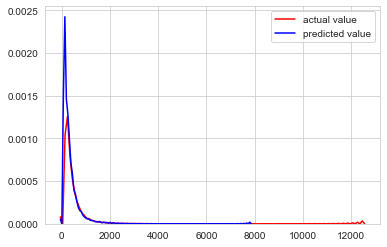

In [54]:
import seaborn as sns# relation b/w test and pred values ofRandomForestRegressor
ax1=sns.distplot(y_test1,hist=False, color="r", label="actual value")
sns.distplot(y_pred3,hist=False, color="b", label="predicted value", ax=ax1)

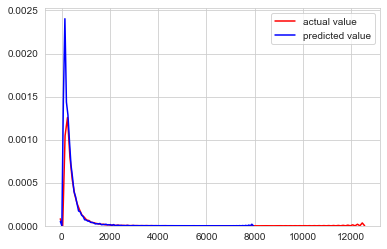

In [55]:
import seaborn as sns# relation b/w test and pred values of DecisionTreeRegressor
ax1=sns.distplot(y_test1,hist=False, color="r", label="actual value")
sns.distplot(y_pred4,hist=False, color="b", label="predicted value", ax=ax1)

NameError: name 'y_pred5' is not defined

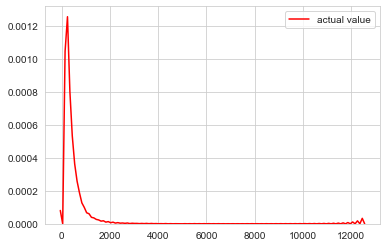

In [57]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(X_train1, y_train1)
y_pred5 = KNN.predict(X_test1)


In [58]:
from sklearn.metrics import r2_score#for KNeighborsRegressor
r2_score(y_test1, y_pred5)

0.7113366119339815

In [59]:
from sklearn import metrics#for KNeighborsRegressor
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test1, y_pred5)))

RMSLE: 59.9938343755151


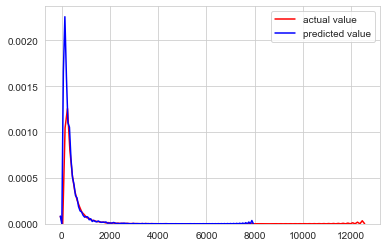

In [60]:
import seaborn as sns# relation b/w test and pred values of KNeighborsRegressor
ax1=sns.distplot(y_test1,hist=False, color="r", label="actual value")
sns.distplot(y_pred5,hist=False, color="b", label="predicted value", ax=ax1)